In [1]:
# !pip install kmodes

# INSURANCE PRODUCT PREDICTION IN NAKURU

##### Objective
This project aims to predict which clusters in Nakuru County would likely buy which insurance product. Its aim is to aid insurance companies in identifying which specific groups in Nakuru County would likely buy which product enabling them to tailor marketing and advertising appropriately, increasing the probability of a sale.

##### Dataset
The dataset used for this project is the Financial Access Dataset 2021. The dataset is very big containing over 2000 columns. TO ensure only reliable attributes are used, the main dataframe used for this project is a sample from the original data.

### Data Loading

In [86]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes

# pd.options.display.max_rows = 35
# plt.rcParams['figure.figsize'] = [8, 4]

In [3]:
df_samples = pd.read_excel('Updated Anonymized Weighted FinAccess 2021.xlsx')
df_samples.head()

,Serial Number,County,ClusterNo,HHNo,interview__key,interview__id,A9,A9i,A10i,A14v,...,allotherformal_banked2022,formal_banked2022,excluded_informal_banked2022,NHIF_health_insurance,NHIF_ONLY,Medical_Insurance_ONLY,BothNHIF_medical,Nomedical,NHIFMedical_Cat,adults
0,1,Trans Nzoia,10226038,1048,10-67-89-46,0003fc74b3fe418ea041bd6a9e7ff387,Rural,Access granted,Female,1,...,Yes,No,Other Formal,Yes,NaN,NaN,1.0,NaN,Users of NHIF + medical insurance (C1_42 and C...,1 adult Household
1,2,Busia,10240034,1080,39-64-68-81,0004890b17744272baf0a0c7b4c20771,Rural,Access granted,Female,4,...,No,Yes,Banked,Yes,1.0,NaN,NaN,NaN,"Users of NHIF only, with no medical insurance",>1 adult Household
2,3,Machakos,10216062,1013,92-34-74-01,00052153fe8c4abaa189caadcb87b2b4,Rural,Access granted,Male,1,...,No,No,Excluded,Yes,1.0,NaN,NaN,NaN,"Users of NHIF only, with no medical insurance",1 adult Household
3,4,Kisumu,10242078,1026,08-14-22-63,000d1f8747194b6a84862830dc5fe7ca,Rural,Access granted,Male,5,...,No,Yes,Banked,No,NaN,NaN,NaN,"Users of NHIF only, with no medical insurance",None users of any of NHIF and medical insurance,>1 adult Household
4,5,Nyeri,10219138,1019,99-12-05-84,000f5a5c0e3246ac9a62603ad936e3da,Urban,Access granted,Male,3,...,No,Yes,Banked,No,NaN,NaN,NaN,"Users of NHIF only, with no medical insurance",None users of any of NHIF and medical insurance,>1 adult Household


#### Data Preparation

In [4]:
#select data from nakuru county

nakuru  = df_samples[df_samples['County'] == 'Nakuru']
nakuru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805 entries, 48 to 22019
Columns: 2332 entries, Serial Number to adults
dtypes: float64(206), int64(76), object(2050)
memory usage: 14.3+ MB


In [5]:
nakuru.head()

,Serial Number,County,ClusterNo,HHNo,interview__key,interview__id,A9,A9i,A10i,A14v,...,allotherformal_banked2022,formal_banked2022,excluded_informal_banked2022,NHIF_health_insurance,NHIF_ONLY,Medical_Insurance_ONLY,BothNHIF_medical,Nomedical,NHIFMedical_Cat,adults
48,49,Nakuru,10232202,1090,95-50-72-90,00a5d78402974eca9eb2f0e2bfb2df3b,Urban,Access granted,Female,5,...,No,No,Excluded,No,NaN,NaN,NaN,"Users of NHIF only, with no medical insurance",None users of any of NHIF and medical insurance,>1 adult Household
180,181,Nakuru,10232130,1067,37-30-21-49,0265fd66b5e249809eb93a6f242d1bfa,Urban,Access granted,Female,2,...,No,Yes,Banked,No,NaN,NaN,NaN,"Users of NHIF only, with no medical insurance",None users of any of NHIF and medical insurance,>1 adult Household
188,189,Nakuru,10232034,1012,76-74-21-49,0279d89f2bc4492db64a821d217afb8c,Rural,Access granted,Male,2,...,No,Yes,Banked,No,NaN,NaN,NaN,"Users of NHIF only, with no medical insurance",None users of any of NHIF and medical insurance,>1 adult Household
213,214,Nakuru,10232066,1032,46-66-78-61,02c2c43d1fd84b3ab574d312d2af93f7,Rural,Access granted,Male,2,...,No,Yes,Banked,No,NaN,NaN,NaN,"Users of NHIF only, with no medical insurance",None users of any of NHIF and medical insurance,>1 adult Household
227,228,Nakuru,10232214,1023,29-48-44-55,030ab71056c44f17a55bff4ae8a20c2f,Urban,Access granted,Male,2,...,No,Yes,Banked,No,NaN,NaN,NaN,"Users of NHIF only, with no medical insurance",None users of any of NHIF and medical insurance,>1 adult Household


In [6]:
#check null values
nakuru[nakuru.columns].isnull().sum()

Serial Number               0
County                      0
ClusterNo                   0
HHNo                        0
interview__key              0
                         ... 
Medical_Insurance_ONLY    799
BothNHIF_medical          802
Nomedical                 214
NHIFMedical_Cat             0
adults                      0
Length: 2332, dtype: int64

In [7]:
#drop columns with more than 3/4 of values missing
threshold = len(nakuru) * 0.75

nakuru = nakuru.dropna(thresh=threshold, axis=1)
nakuru.isnull().sum()

Serial Number                   0
County                          0
ClusterNo                       0
HHNo                            0
interview__key                  0
                               ..
formal_banked2022               0
excluded_informal_banked2022    0
NHIF_health_insurance           0
NHIFMedical_Cat                 0
adults                          0
Length: 777, dtype: int64

In [8]:
#reset index
nakuru = nakuru.reset_index()
nakuru.drop(columns='index', inplace=True)

Select features to be used:

In [9]:
nakuru_df = nakuru[['HHNo', 'A9', 'A19', 'A24','nhif_usage', 'nssf_usage','insurance_usage','insurance_usage1','insurance_usage2','B1A', 'B3B', 'B3I', 'C1_4', 'C1_5', 'C1_6', 'T1', 'U16__3', 'U16__4', 'U16__6', 'U16__7', 'U16__8', 'U16__13', 'U16__10', 'U16__11', 'U16__12', 'U16__14', 'U16__17', 'U16__18','U17i', 'U17ii', 'U17iii', 'U17iv', 'U17v', 'U19', 'U23']]
nakuru_df.head()

,HHNo,A9,A19,A24,nhif_usage,nssf_usage,insurance_usage,insurance_usage1,insurance_usage2,B1A,...,U16__14,U16__17,U16__18,U17i,U17ii,U17iii,U17iv,U17v,U19,U23
0,1090,Urban,16,No,Never had,Never had,Never had,Never had,Never had,Educating yourself or your family,...,No,No,No,0,0,0,0,0,No,7000
1,1067,Urban,27,No,Used to have,Used to have,Never had,Used to have,Used to have,Putting food on the table,...,No,No,No,0,0,0,0,0,No,20000
2,1012,Rural,22,No,Never had,Never had,Never had,Never had,Never had,Putting food on the table,...,No,No,No,0,0,0,0,0,No,10000
3,1032,Rural,29,No,Never had,Never had,Never had,Never had,Never had,Getting a job/developing your career,...,No,No,No,0,0,0,0,0,No,20000
4,1023,Urban,32,No,Never had,Never had,Never had,Never had,Never had,Getting a job/developing your career,...,No,No,No,0,0,0,0,0,No,10000


Rename features to understandable feature_names:

In [10]:
new_names = {'A9':'area', 'A24':'chronic_illness', 'A19':'age_of_respondent', 'B1A': 'most_important_life_goal', 'B3B':'income_source', 'B3I':'avg_mnth_income', 'C1_4':'hse_land_loan', 'C1_5':'insurance_use', 'C1_6':'securities_use', 'T1':'nearest_financial_prod', 'U16__3':'TV_and_decoder', 'U16__4':'internet_TV', 'U16__6':'mobile_phone', 'U16__7':'fixed_internet', 'U16__8':'computer', 'U16__13': 'refrigerator', 'U16__10':'motorcycle', 'U16__11':'car', 'U16__12':'bus_lorry', 'U16__14': 'motorboat', 'U16__17': 'tuktuk', 'U16__18':'tractor', 'U17i':'dairy_cattle', 'U17ii':'beef_cattle', 'U17iii': 'indigenous_cattle', 'U17iv': 'sheep', 'U17v':'goats', 'U19':'land_house_ownership', 'U23':'total_exp_per_moth'}
nakuru_df = nakuru_df.rename(columns=new_names)

In [11]:
nakuru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   HHNo                      805 non-null    int64 
 1   area                      805 non-null    object
 2   age_of_respondent         805 non-null    int64 
 3   chronic_illness           805 non-null    object
 4   nhif_usage                805 non-null    object
 5   nssf_usage                805 non-null    object
 6   insurance_usage           805 non-null    object
 7   insurance_usage1          805 non-null    object
 8   insurance_usage2          805 non-null    object
 9   most_important_life_goal  805 non-null    object
 10  income_source             805 non-null    object
 11  avg_mnth_income           805 non-null    object
 12  hse_land_loan             805 non-null    object
 13  insurance_use             805 non-null    object
 14  securities_use            

##### Feature Engineering

Consolidate the columns 'computer', 'TV_and_decoder', 'internet_TV', 'mobile_phone', 'fixed_internet', 'refrigerator' to one feature known as electronic device, which is the use of an electronice device in the interviewed house holds,

In [12]:
columns = ['computer', 'TV_and_decoder', 'internet_TV', 'mobile_phone', 'fixed_internet', 'refrigerator' ]

nakuru_df['electronic_device'] = nakuru_df[columns].apply(lambda row: 'Yes' if 'Yes' in row.values else 'No', axis=1)
nakuru_df.head()

,HHNo,area,age_of_respondent,chronic_illness,nhif_usage,nssf_usage,insurance_usage,insurance_usage1,insurance_usage2,most_important_life_goal,...,tuktuk,tractor,dairy_cattle,beef_cattle,indigenous_cattle,sheep,goats,land_house_ownership,total_exp_per_moth,electronic_device
0,1090,Urban,16,No,Never had,Never had,Never had,Never had,Never had,Educating yourself or your family,...,No,No,0,0,0,0,0,No,7000,No
1,1067,Urban,27,No,Used to have,Used to have,Never had,Used to have,Used to have,Putting food on the table,...,No,No,0,0,0,0,0,No,20000,Yes
2,1012,Rural,22,No,Never had,Never had,Never had,Never had,Never had,Putting food on the table,...,No,No,0,0,0,0,0,No,10000,No
3,1032,Rural,29,No,Never had,Never had,Never had,Never had,Never had,Getting a job/developing your career,...,No,No,0,0,0,0,0,No,20000,No
4,1023,Urban,32,No,Never had,Never had,Never had,Never had,Never had,Getting a job/developing your career,...,No,No,0,0,0,0,0,No,10000,No


In [13]:
# same for motorvehicle ownership
columns1 = ['motorcycle', 'car', 'bus_lorry', 'motorboat', 'tuktuk', 'tractor' ]

nakuru_df['motorvehicle_ownership'] = nakuru_df[columns1].apply(lambda row: 'Yes' if 'Yes' in row.values else 'No', axis=1)

In [14]:
#and livestock ownership
columns2 = ['dairy_cattle', 'beef_cattle', 'indigenous_cattle', 'sheep', 'goats']

nakuru_df['livestock_ownership'] = nakuru_df[columns2].apply(lambda row: True if True in row.values else False, axis=1)

In [15]:
#drop unused columns
nakuru_df.drop(columns=columns + columns1 + columns2, inplace=True, axis=1)

In [16]:
nakuru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   HHNo                      805 non-null    int64 
 1   area                      805 non-null    object
 2   age_of_respondent         805 non-null    int64 
 3   chronic_illness           805 non-null    object
 4   nhif_usage                805 non-null    object
 5   nssf_usage                805 non-null    object
 6   insurance_usage           805 non-null    object
 7   insurance_usage1          805 non-null    object
 8   insurance_usage2          805 non-null    object
 9   most_important_life_goal  805 non-null    object
 10  income_source             805 non-null    object
 11  avg_mnth_income           805 non-null    object
 12  hse_land_loan             805 non-null    object
 13  insurance_use             805 non-null    object
 14  securities_use            

In [17]:
nakuru_df.head()

,HHNo,area,age_of_respondent,chronic_illness,nhif_usage,nssf_usage,insurance_usage,insurance_usage1,insurance_usage2,most_important_life_goal,...,avg_mnth_income,hse_land_loan,insurance_use,securities_use,nearest_financial_prod,land_house_ownership,total_exp_per_moth,electronic_device,motorvehicle_ownership,livestock_ownership
0,1090,Urban,16,No,Never had,Never had,Never had,Never had,Never had,Educating yourself or your family,...,8000,Never used,Never used,Never used,Mobile Money Agent (for depositing or withdraw...,No,7000,No,No,False
1,1067,Urban,27,No,Used to have,Used to have,Never had,Used to have,Used to have,Putting food on the table,...,2000,Never used,Never used,Never used,Mobile Money Agent (for depositing or withdraw...,No,20000,Yes,Yes,False
2,1012,Rural,22,No,Never had,Never had,Never had,Never had,Never had,Putting food on the table,...,"""Don't know(DO NOT READ OUT)""",Never used,Never used,Never used,Mobile Money Agent (for depositing or withdraw...,No,10000,No,Yes,False
3,1032,Rural,29,No,Never had,Never had,Never had,Never had,Never had,Getting a job/developing your career,...,"""Don't know(DO NOT READ OUT)""",Never used,Never used,Used to use,Mobile Money Agent (for depositing or withdraw...,No,20000,No,No,False
4,1023,Urban,32,No,Never had,Never had,Never had,Never had,Never had,Getting a job/developing your career,...,8000,Never used,Never used,Never used,Mobile Money Agent (for depositing or withdraw...,No,10000,No,No,False


Clean feature values:

For columns with usage attributes, we integrate 'used to have' and 'currently have' to 'Yes', and 'Never had' to 'No'

Nhif and Nssf:

In [18]:
nakuru_df['nhif_usage'].unique()

array(['Never had', 'Used to have', 'Currently have'], dtype=object)

In [19]:
nakuru_df['nssf_usage'].unique()

array(['Never had', 'Used to have', 'Currently have'], dtype=object)

In [20]:
#replace values
replacements = {'Never had' : 'No', 'Used to have': 'Yes', 'Currently have': 'Yes'}
nakuru_df['nhif_usage'] = nakuru_df['nhif_usage'].replace(replacements)
nakuru_df['nssf_usage'] = nakuru_df['nssf_usage'].replace(replacements)

House and Land Loan use, Insurance use, Securities use:

In [21]:
print(nakuru_df['hse_land_loan'].unique())
print(nakuru_df['insurance_use'].unique())
print(nakuru_df['insurance_usage'].unique())
print(nakuru_df['insurance_usage1'].unique())
print(nakuru_df['insurance_usage2'].unique())
print(nakuru_df['securities_use'].unique())

['Never used' 'Currently use' 'Used to use']
['Never used' 'Currently use' 'Used to use']
['Never had' 'Currently have' 'Used to have']
['Never had' 'Used to have' 'Currently have']
['Never had' 'Used to have' 'Currently have']
['Never used' 'Used to use' 'Currently use']


In [22]:
#replace values
replacements = {'Never used' : 'No', 'Used to use': 'Yes', 'Currently use': 'Yes'}
nakuru_df['hse_land_loan'] = nakuru_df['hse_land_loan'].replace(replacements)
nakuru_df['insurance_use'] = nakuru_df['insurance_use'].replace(replacements)
nakuru_df['securities_use'] = nakuru_df['securities_use'].replace(replacements)

In [23]:
replacements = {'Never had' : 'No', 'Used to have': 'Yes', 'Currently have': 'Yes'}
nakuru_df['insurance_usage'] = nakuru_df['insurance_usage'].replace(replacements)
nakuru_df['insurance_usage1'] = nakuru_df['insurance_usage1'].replace(replacements)
nakuru_df['insurance_usage2'] = nakuru_df['insurance_usage2'].replace(replacements)

In [24]:
#merge insurance use
columns3 = ['insurance_use', 'insurance_usage', 'insurance_usage1', 'insurance_usage2']

nakuru_df['insurance'] = nakuru_df[columns3].apply(lambda row: 'Yes' if 'Yes' in row.values else 'No', axis=1)
nakuru_df.drop(columns=columns3, axis=1, inplace=True)

Simplify life goal column:

In [25]:
nakuru_df['most_important_life_goal'].unique()

array(['Educating yourself or your family', 'Putting food on the table',
       'Getting a job/developing your career',
       'Starting/Improving your business/farm/ add livestock',
       'Health (yourself or family/ others)',
       'Buying land/ Building a house / improving your house',
       '"Buying assets e.g.  TV, refrigerator',
       '"Refused to Answer (DO NOT READ OUT)"',
       'None  of these (Do not read out)'], dtype=object)

In [26]:
replacements = {'Educating yourself or your family' : 'Education',
                'Putting food on the table': 'Food',
                'Getting a job/developing your career': 'Career',
                'Starting/Improving your business/farm/ add livestock': 'Business', 
                'Health (yourself or family/ others)':'Health',
                'Buying land/ Building a house / improving your house': 'Home',
                '"Buying assets e.g.  TV, refrigerator': 'Assets',
                '"Refused to Answer (DO NOT READ OUT)"':'None', 
                'None  of these (Do not read out)':'None'}
nakuru_df['most_important_life_goal'] = nakuru_df['most_important_life_goal'].replace(replacements)

Average Monthly Income:

In [27]:
income = nakuru_df['avg_mnth_income'].unique()
income

array([8000, 2000, '"Don\'t know(DO NOT READ OUT)"', 4000, 10000, 1000,
       3000, 15000, 300, 5000, 50000, 7000, 9000, 65000, 4500,
       '"Refused to Answer(DO NOT READ OUT)"', 6000, 70000, 20000, 200,
       3800, 22000, 100000, 44000, 500, 18000, 28000, 1500, 25000, 12000,
       16000, 30000, 7200, 21000, 8500, 11000, 6700, 2800, 24000, 40000,
       3600, 4800, 45000, 1200, 17000, 2400, 9500, 13000, 60000, 12500,
       3200, 600, 14000, 9600, 2500, 1600, 1800, 5200, 100, 80000, 7500,
       70001, 35000, 800, 27000], dtype=object)

In [28]:
replacements = {'"Don\'t know(DO NOT READ OUT)"' : pd.NA, '"Refused to Answer(DO NOT READ OUT)"': pd.NA}
nakuru_df['avg_mnth_income'] = nakuru_df['avg_mnth_income'].replace(replacements)

Source of Income:

In [29]:
nakuru_df['income_source'].unique()

array(['Money / support from family / friends / spouse', 'Casual worker',
       'Running own business/Self employed',
       'Farming (crops, keeping livestock, fishing, aquaculture)',
       'Employed', 'Renting,  land, house/rooms, equipment',
       'Pension/Annuity', 'Money from  NGO / Government'], dtype=object)

In [30]:
replacements = {'Money / support from family / friends / spouse' : 'Family',
                'Casual worker': 'Casual_work',
                'Running own business/Self employed': 'Business', 
                'Farming (crops, keeping livestock, fishing, aquaculture)':'Agriculture',
                'Employed': 'Employment',
                'Renting,  land, house/rooms, equipment': 'Renting',
                'Pension/Annuity':'Pension', 
                'Money from  NGO / Government':'Aid'}
nakuru_df['income_source'] = nakuru_df['income_source'].replace(replacements)

Nearest Financial product:

In [31]:
nakuru_df['nearest_financial_prod'].unique()

array(['Mobile Money Agent (for depositing or withdrawing cash)',
       'Bank Agent/ Post Bank Agent', '"Don\'t know(DO NOT READ OUT)"',
       'Bank/Post Bank Branch/ Head Office/ ATM', nan,
       'Insurance company/ agent'], dtype=object)

In [32]:
replacements = {'Mobile Money Agent (for depositing or withdrawing cash)' : 'MMoney',
                'Bank Agent/ Post Bank Agent': 'Bank',
                'Bank/Post Bank Branch/ Head Office/ ATM': 'Bank', 
                'Insurance company/ agent':'Insurance',
                '"Don\'t know(DO NOT READ OUT)"': pd.NA}
nakuru_df['nearest_financial_prod'] = nakuru_df['nearest_financial_prod'].replace(replacements)

In [33]:
nakuru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   HHNo                      805 non-null    int64 
 1   area                      805 non-null    object
 2   age_of_respondent         805 non-null    int64 
 3   chronic_illness           805 non-null    object
 4   nhif_usage                805 non-null    object
 5   nssf_usage                805 non-null    object
 6   most_important_life_goal  805 non-null    object
 7   income_source             805 non-null    object
 8   avg_mnth_income           699 non-null    object
 9   hse_land_loan             805 non-null    object
 10  securities_use            805 non-null    object
 11  nearest_financial_prod    798 non-null    object
 12  land_house_ownership      803 non-null    object
 13  total_exp_per_moth        803 non-null    object
 14  electronic_device         

Land and house ownership:

In [34]:
nakuru_df['land_house_ownership'].unique()

array(['No', 'Yes', nan, '"Refused to Answer (DO NOT READ OUT)"'],
      dtype=object)

In [35]:
replacements = {'"Refused to Answer (DO NOT READ OUT)"': pd.NA}
nakuru_df['land_house_ownership'] = nakuru_df['land_house_ownership'].replace(replacements)

In [36]:
#drop missing values
nakuru_df = nakuru_df.dropna()
nakuru_df.isnull().sum()

HHNo                        0
area                        0
age_of_respondent           0
chronic_illness             0
nhif_usage                  0
nssf_usage                  0
most_important_life_goal    0
income_source               0
avg_mnth_income             0
hse_land_loan               0
securities_use              0
nearest_financial_prod      0
land_house_ownership        0
total_exp_per_moth          0
electronic_device           0
motorvehicle_ownership      0
livestock_ownership         0
insurance                   0
dtype: int64

## Exploratory Data Analysis

#### Distribution of attributes

array([[<Axes: title={'center': 'avg_mnth_income'}>]], dtype=object)

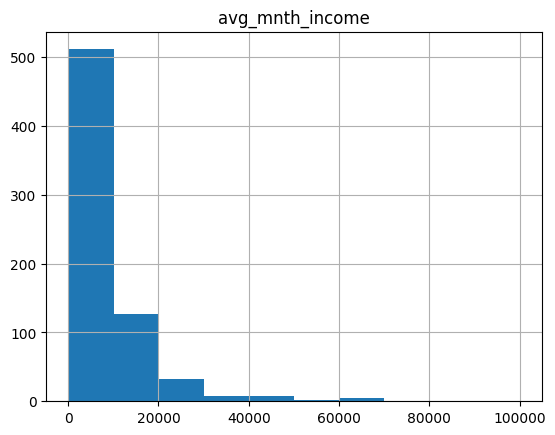

In [37]:
#average monthly income
nakuru_df['avg_mnth_income'] = nakuru_df['avg_mnth_income'].astype('int')

nakuru_df.hist(column='avg_mnth_income')

Majority of the sample earn an average monthly income below 10,000/=

In [38]:
#distribution of income by area and insurance use

fig = px.box(nakuru_df, x='area', y='avg_mnth_income')
fig.show()

People living in the urban areas earn a little bit more than those living in the rural areas. 

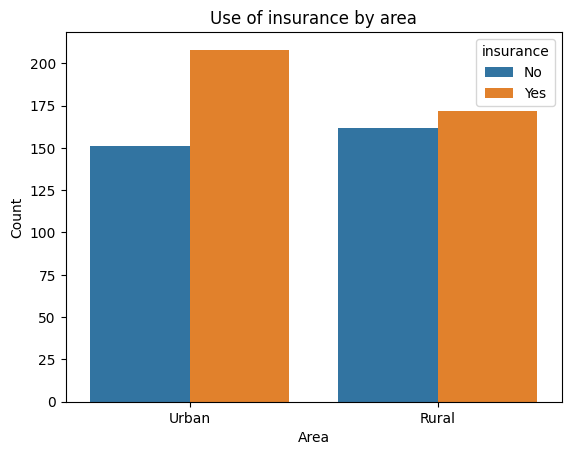

<Figure size 2000x1500 with 0 Axes>

In [39]:
sns.countplot(x='area', hue='insurance', data=nakuru_df)
plt.title('Use of insurance by area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.figure(figsize=[20, 15])
plt.show()

People living in urban areas use insurance more than those living in rural areas.

In [40]:
income_avg_by_insurance = nakuru_df.groupby('insurance')['avg_mnth_income'].describe()
income_avg_by_insurance

,count,mean,std,min,25%,50%,75%,max
insurance,,,,,,,,
No,313.0,6847.923323,7899.018348,100.0,2000.0,5000.0,10000.0,100000.0
Yes,380.0,12309.476316,12618.960195,500.0,5000.0,9800.0,15000.0,80000.0


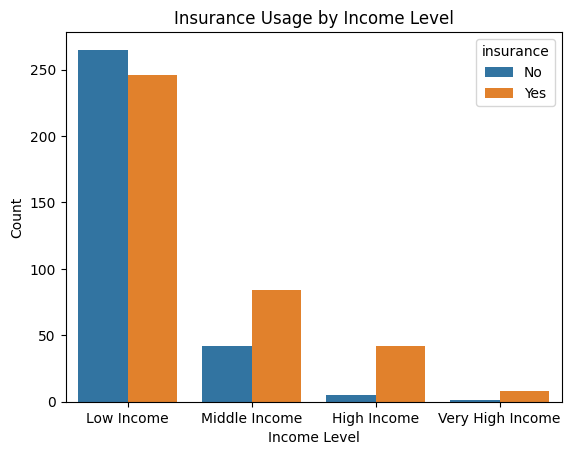

In [41]:
nakuru_df['income_bins'] = pd.cut(nakuru_df['avg_mnth_income'], bins=[0, 10000, 20000, 50000, nakuru_df['avg_mnth_income'].max()],
                             labels=['Low Income', 'Middle Income', 'High Income', 'Very High Income'])

# Bar plot for insurance usage across income bins
sns.countplot(x='income_bins', hue='insurance', data=nakuru_df)
plt.title('Insurance Usage by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()

Low income earners are less likely to use insurance products comprared to middle, high, and very high income earners.

In [42]:
nakuru_df = nakuru_df.rename({'total_exp_per_moth':'total_exp_per_month'}, axis=1)
nakuru_df['total_exp_per_month'] = nakuru_df['total_exp_per_month'].astype('int')

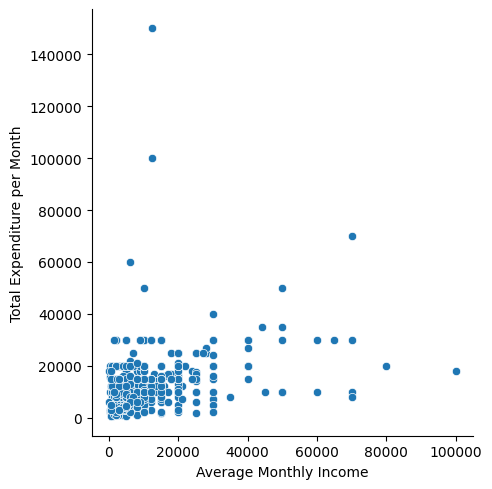

In [43]:
#avg income vs total expenditure

g = sns.relplot(data=nakuru_df, x='avg_mnth_income', y='total_exp_per_month')
g.set_axis_labels("Average Monthly Income", "Total Expenditure per Month")
plt.show()

Most of the house holds live within their wage. There are a few who either spend above or below their income level.

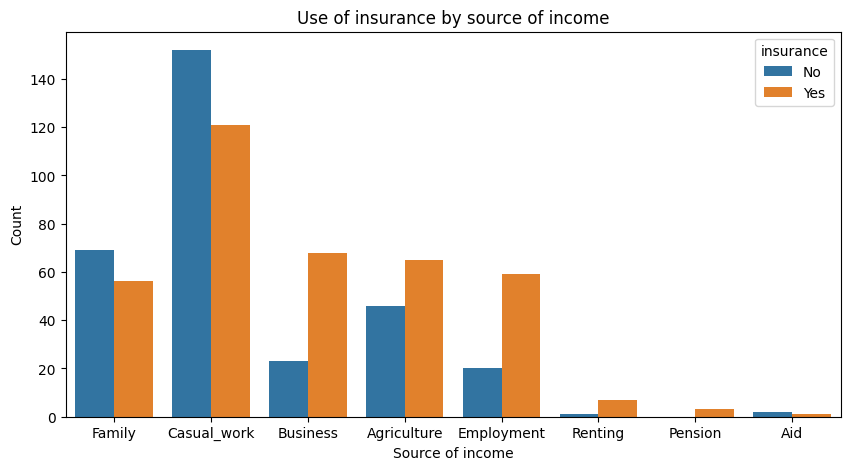

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(x='income_source', hue='insurance', data=nakuru_df)
plt.title('Use of insurance by source of income')
plt.xlabel('Source of income')
plt.ylabel('Count')
plt.show()

People with some sort of consistent employment(business, agriculture, etc) are more likely to use insurance, whereas those who depend on casual work or help for income are less likely to use insurance.

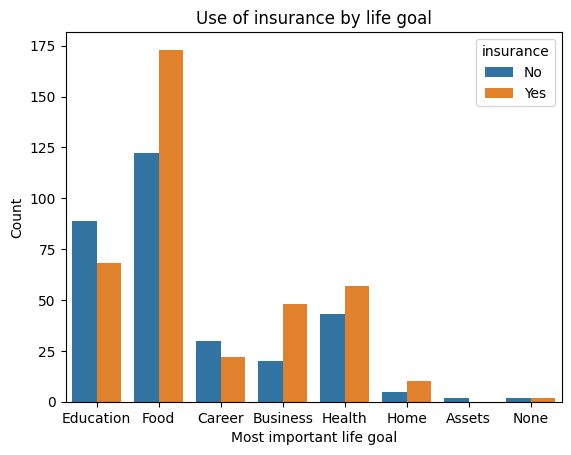

In [45]:
sns.countplot(x='most_important_life_goal', hue='insurance', data=nakuru_df)
plt.title('Use of insurance by life goal')
plt.xlabel('Most important life goal')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

The households whose main goals are to put food on the table, improve business, buy land or build a home, and cater for health needs, tend to most likely use an insurance product. Households who prioritize furthering of education as well as career tend to least use inurance products.

In [46]:
nakuru_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 693 entries, 0 to 802
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   HHNo                      693 non-null    int64   
 1   area                      693 non-null    object  
 2   age_of_respondent         693 non-null    int64   
 3   chronic_illness           693 non-null    object  
 4   nhif_usage                693 non-null    object  
 5   nssf_usage                693 non-null    object  
 6   most_important_life_goal  693 non-null    object  
 7   income_source             693 non-null    object  
 8   avg_mnth_income           693 non-null    int64   
 9   hse_land_loan             693 non-null    object  
 10  securities_use            693 non-null    object  
 11  nearest_financial_prod    693 non-null    object  
 12  land_house_ownership      693 non-null    object  
 13  total_exp_per_month       693 non-null    int64   
 14 

### Clustering

##### Prepare data for clustering

Fix Data types:
<br> 
    Expenditure Per Month to Integer
    <br>
    Map Liverstock ownership(bool) to 1 and 0
    <br>
    Map all attributes with two values(Yes and No) to 1 and 0

In [48]:
cluster_data = nakuru_df.drop(columns=['HHNo', 'income_bins'])
cluster_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 693 entries, 0 to 802
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   area                      693 non-null    object
 1   age_of_respondent         693 non-null    int64 
 2   chronic_illness           693 non-null    object
 3   nhif_usage                693 non-null    object
 4   nssf_usage                693 non-null    object
 5   most_important_life_goal  693 non-null    object
 6   income_source             693 non-null    object
 7   avg_mnth_income           693 non-null    int64 
 8   hse_land_loan             693 non-null    object
 9   securities_use            693 non-null    object
 10  nearest_financial_prod    693 non-null    object
 11  land_house_ownership      693 non-null    object
 12  total_exp_per_month       693 non-null    int64 
 13  electronic_device         693 non-null    object
 14  motorvehicle_ownership    693 n

In [49]:
#scale numerical columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data[['age_of_respondent', 'avg_mnth_income', 'total_exp_per_month']])

pd.DataFrame(scaled_data).describe()

,0,1,2
count,6.930000e+02,6.930000e+02,6.930000e+02
mean,-6.408214e-18,-5.639228e-17,6.664542e-17
std,1.000722e+00,1.000722e+00,1.000722e+00
min,-1.348647e+00,-8.800270e-01,-1.053415e+00
25%,-7.317818e-01,-6.180796e-01,-6.025618e-01
50%,-2.382897e-01,-3.470996e-01,-1.016137e-01
75%,5.019484e-01,1.948604e-01,3.993345e-01
max,3.709647e+00,8.143608e+00,1.392493e+01


In [50]:
cluster_data[['age_of_respondent', 'avg_mnth_income', 'total_exp_per_month']] = scaled_data


In [51]:
cluster_data.head()

,area,age_of_respondent,chronic_illness,nhif_usage,nssf_usage,most_important_life_goal,income_source,avg_mnth_income,hse_land_loan,securities_use,nearest_financial_prod,land_house_ownership,total_exp_per_month,electronic_device,motorvehicle_ownership,livestock_ownership,insurance
0,Urban,-1.348647,No,No,No,Education,Family,-0.166446,No,No,MMoney,No,-0.402183,No,No,False,No
1,Urban,-0.670095,No,Yes,Yes,Food,Family,-0.708406,No,No,MMoney,No,0.900283,Yes,Yes,False,Yes
4,Urban,-0.361663,No,No,No,Career,Casual_work,-0.166446,No,No,MMoney,No,-0.101614,No,No,False,No
5,Rural,-0.176603,No,No,No,Career,Casual_work,-0.527753,No,No,MMoney,Yes,-0.602562,No,No,True,No
6,Urban,-0.423349,No,No,No,Business,Business,0.014207,No,No,MMoney,No,0.900283,Yes,Yes,False,No


In [52]:
cat_cols = ['most_important_life_goal', 'area', 'income_source', 'nearest_financial_prod']

encoded = pd.get_dummies(cluster_data[cat_cols])
encoded


,most_important_life_goal_Assets,most_important_life_goal_Business,most_important_life_goal_Career,most_important_life_goal_Education,most_important_life_goal_Food,most_important_life_goal_Health,most_important_life_goal_Home,most_important_life_goal_None,area_Rural,area_Urban,...,income_source_Aid,income_source_Business,income_source_Casual_work,income_source_Employment,income_source_Family,income_source_Pension,income_source_Renting,nearest_financial_prod_Bank,nearest_financial_prod_Insurance,nearest_financial_prod_MMoney
0,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
5,False,False,True,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
6,False,True,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,False,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
799,False,False,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
800,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
801,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True


In [53]:
model_data = pd.concat([cluster_data.drop(cat_cols, axis=1), encoded], axis=1)
model_data

,age_of_respondent,chronic_illness,nhif_usage,nssf_usage,avg_mnth_income,hse_land_loan,securities_use,land_house_ownership,total_exp_per_month,electronic_device,...,income_source_Aid,income_source_Business,income_source_Casual_work,income_source_Employment,income_source_Family,income_source_Pension,income_source_Renting,nearest_financial_prod_Bank,nearest_financial_prod_Insurance,nearest_financial_prod_MMoney
0,-1.348647,No,No,No,-0.166446,No,No,No,-0.402183,No,...,False,False,False,False,True,False,False,False,False,True
1,-0.670095,No,Yes,Yes,-0.708406,No,No,No,0.900283,Yes,...,False,False,False,False,True,False,False,False,False,True
4,-0.361663,No,No,No,-0.166446,No,No,No,-0.101614,No,...,False,False,True,False,False,False,False,False,False,True
5,-0.176603,No,No,No,-0.527753,No,No,Yes,-0.602562,No,...,False,False,True,False,False,False,False,False,False,True
6,-0.423349,No,No,No,0.014207,No,No,No,0.900283,Yes,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,0.378575,No,No,No,0.014207,No,No,No,-0.101614,No,...,False,False,True,False,False,False,False,True,False,False
799,0.131829,Yes,No,No,-0.166446,No,No,No,-0.502372,No,...,False,True,False,False,False,False,False,False,False,True
800,-0.423349,No,No,No,-0.256773,No,No,No,1.401231,No,...,False,False,False,False,True,False,False,False,False,True
801,-0.608409,No,No,Yes,-0.618080,No,No,No,0.399334,Yes,...,False,False,False,False,True,False,False,False,False,True


In [54]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 693 entries, 0 to 802
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age_of_respondent                   693 non-null    float64
 1   chronic_illness                     693 non-null    object 
 2   nhif_usage                          693 non-null    object 
 3   nssf_usage                          693 non-null    object 
 4   avg_mnth_income                     693 non-null    float64
 5   hse_land_loan                       693 non-null    object 
 6   securities_use                      693 non-null    object 
 7   land_house_ownership                693 non-null    object 
 8   total_exp_per_month                 693 non-null    float64
 9   electronic_device                   693 non-null    object 
 10  motorvehicle_ownership              693 non-null    object 
 11  livestock_ownership                 693 non-null  

In [55]:

# categories = cluster_data.select_dtypes(include='object').columns.to_list()
# categories

num_column_indices = [0, 4, 8]

cat_column_indices = []
for i in range(len(model_data.columns)):
        if i not in num_column_indices:
            cat_column_indices.append(i)

cat_column_indices

[1,
 2,
 3,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [57]:
# Define the range of potential clusters and gamma values
clusters_range = range(2, 10)
# gamma_range = np.linspace(0.1, 1, 10) # gamma values between 0.1 and 1

# Placeholder variables
costs = []
# best_clusters = None
# best_gamma = None

for n_clusters in clusters_range:
    # for gamma in gamma_range:
        kproto = KPrototypes(n_clusters=n_clusters, init='Huang')
        clusters = kproto.fit_predict(model_data, categorical=cat_column_indices)
        costs.append(kproto.cost_)

        # Check if this configuration beats the best score
        # if score > best_score:
        #     best_score = score
        #     best_clusters = n_clusters
        #     best_gamma = gamma

# print(f"Best score: {best_score}")
# print(f"Optimal number of clusters: {best_clusters}")
# print(f"Optimal gamma value: {best_gamma}")
print(costs)

[np.float64(3326.554141340072), np.float64(2796.0217332915404), np.float64(2527.785967417511), np.float64(2327.85578604376), np.float64(2205.9662068348202), np.float64(2082.6997138753272), np.float64(1991.6645699993323), np.float64(1932.1041243612792)]


In [58]:
clusters_range = range(2, 10)

In [59]:
print(len(clusters_range))
print(len(costs))

8
8


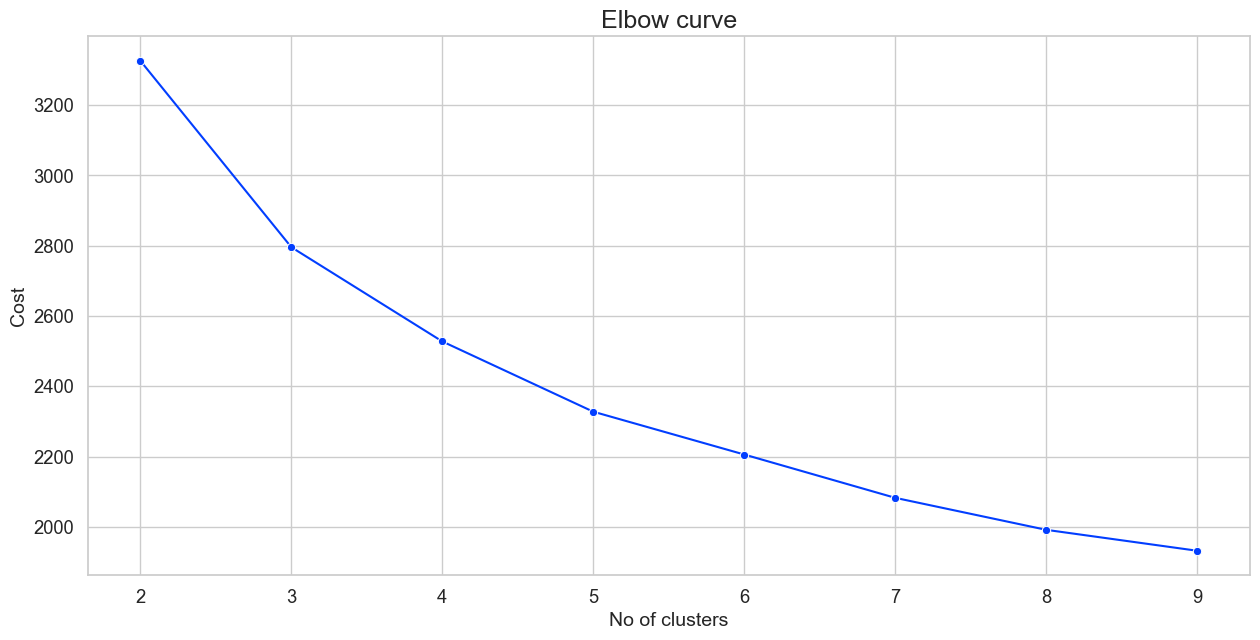

In [60]:
sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=clusters_range, y=costs, marker="o", dashes=False)
ax.set_title('Elbow curve', fontsize=18)
ax.set_xlabel('No of clusters', fontsize=14)
ax.set_ylabel('Cost', fontsize=14)
# ax.set(xlim=(start-0.1, end+0.1))
plt.plot();

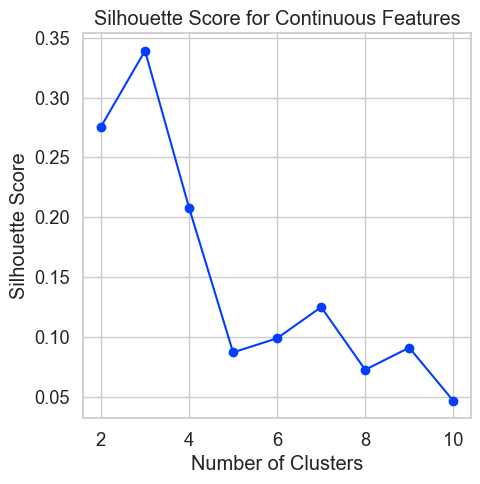

In [70]:


sil_scores = []
for num_clusters in range(2, 11):  # Start from 2 clusters
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42)
    clusters = kproto.fit_predict(model_data, categorical=[i for i in range(model_data.shape[1]) if i not in num_column_indices])
    
    # Silhouette score for continuous features
    silhouette_avg = silhouette_score(model_data.iloc[:, num_column_indices], clusters, metric='euclidean')
    sil_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score for Continuous Features')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Both the Elbow method analysis of costs and silhouette score analysis for continuous variables show the best number of clusters to use is 3.

In [72]:
model_3 = KPrototypes(n_clusters=3, init='Huang', random_state=42, n_jobs=-1)
clusters = model_3.fit_predict(model_data, categorical=cat_column_indices)

In [75]:
model_data['Clusters'] = clusters 

In [76]:
model_data.head()

,age_of_respondent,chronic_illness,nhif_usage,nssf_usage,avg_mnth_income,hse_land_loan,securities_use,land_house_ownership,total_exp_per_month,electronic_device,...,income_source_Business,income_source_Casual_work,income_source_Employment,income_source_Family,income_source_Pension,income_source_Renting,nearest_financial_prod_Bank,nearest_financial_prod_Insurance,nearest_financial_prod_MMoney,Clusters
0,-1.348647,No,No,No,-0.166446,No,No,No,-0.402183,No,...,False,False,False,True,False,False,False,False,True,0
1,-0.670095,No,Yes,Yes,-0.708406,No,No,No,0.900283,Yes,...,False,False,False,True,False,False,False,False,True,0
4,-0.361663,No,No,No,-0.166446,No,No,No,-0.101614,No,...,False,True,False,False,False,False,False,False,True,0
5,-0.176603,No,No,No,-0.527753,No,No,Yes,-0.602562,No,...,False,True,False,False,False,False,False,False,True,0
6,-0.423349,No,No,No,0.014207,No,No,No,0.900283,Yes,...,True,False,False,False,False,False,False,False,True,0


In [88]:
cols = model_data.select_dtypes(include=['object']).columns
model_data[cols] = model_data[cols].astype('bool')
model_data[cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 693 entries, 0 to 802
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   chronic_illness         693 non-null    bool 
 1   nhif_usage              693 non-null    bool 
 2   nssf_usage              693 non-null    bool 
 3   hse_land_loan           693 non-null    bool 
 4   securities_use          693 non-null    bool 
 5   land_house_ownership    693 non-null    bool 
 6   electronic_device       693 non-null    bool 
 7   motorvehicle_ownership  693 non-null    bool 
 8   insurance               693 non-null    bool 
dtypes: bool(9)
memory usage: 11.5 KB


In [ ]:
from lightgbm import LGBMClassifier 
from sklearn.model_selection import cross_val_score

clf_kp = LGBMClassifier()
cv_scores_kp = cross_val_score(clf_kp, shap_data, clusters, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

In [100]:
shap_data = model_data.drop(columns='Clusters')

In [ ]:
import shap

clf_kp.fit(shap_data, clusters)
explainer_kp = shap.Explainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(shap_data)


In [109]:
shap_values_kp.shape

(693, 34, 3)

SHAP Summary for Cluster 0


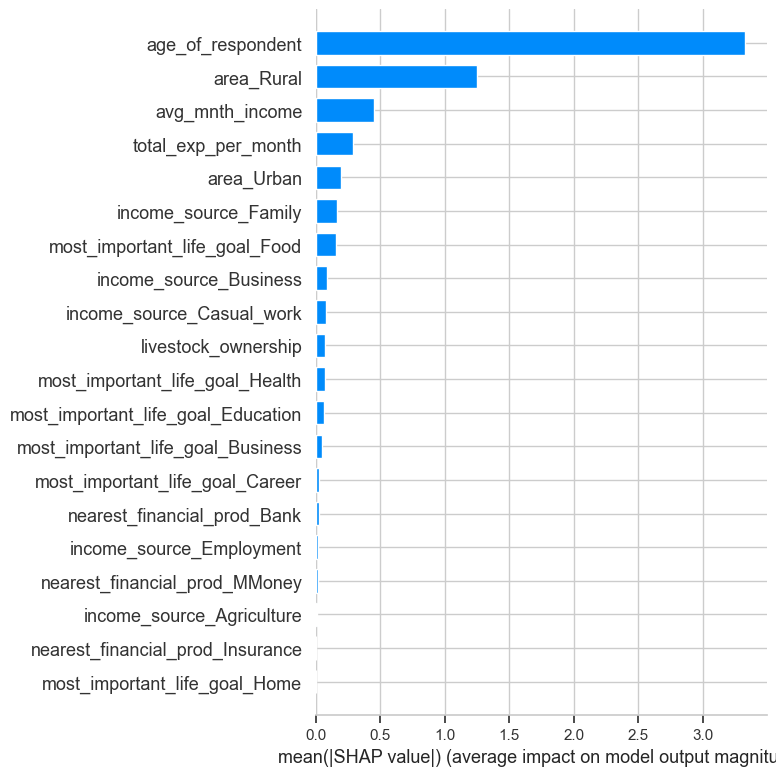

SHAP Summary for Cluster 1


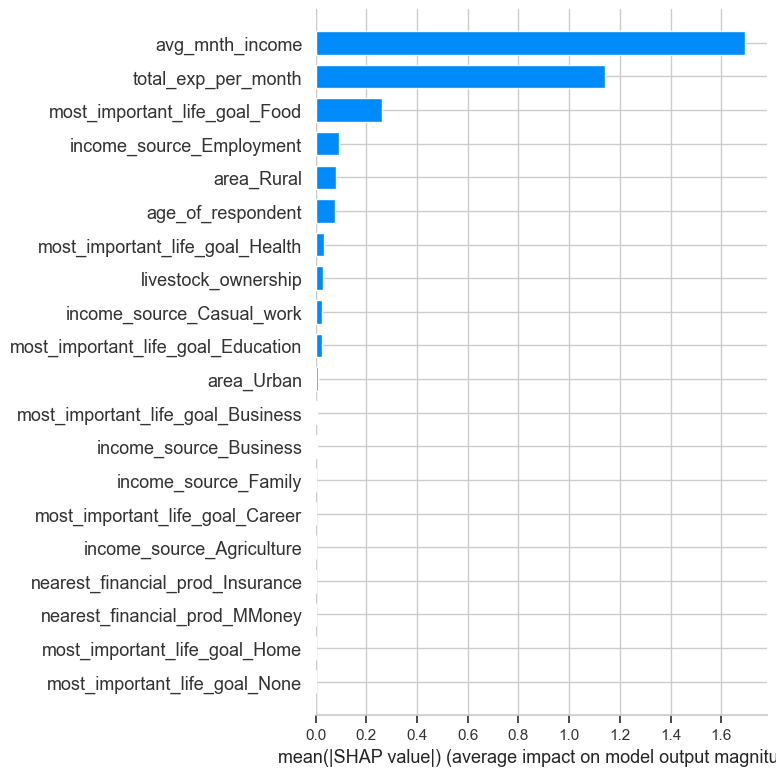

SHAP Summary for Cluster 2


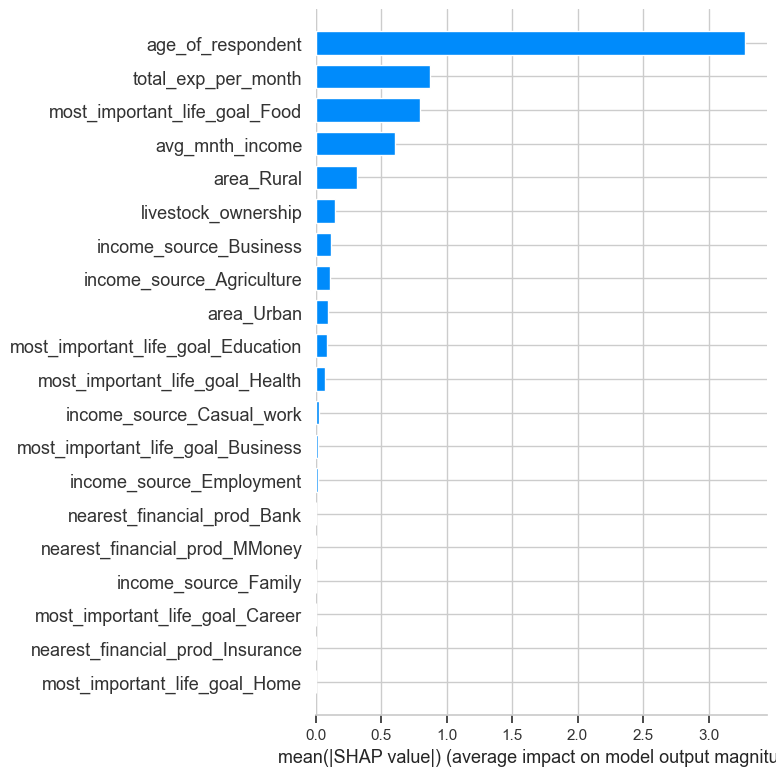

In [114]:
# for cluster_index in range(3):  
#     print(f"SHAP Summary for Cluster {cluster_index}")
#     shap_values_for_cluster = shap_values_kp[:, :, cluster_index]
#     shap.summary_plot(shap_values_for_cluster, shap_data, plot_type="bar", plot_size=(8, 8))

The SHAP values show which attributes most influenced the different cluster formations. These are the top three attributes for each cluster: <br> Cluster 0: <br> - Age of respondent. <br>- Area(Rural). <br> - Average Monthly income. <br> <br>Cluster 1: <br> - Average Monthly Income. <br>- Total Expenditure per month. <br> - Life Goal(Food). <br><br> Cluster 2: <br> - Age of respondent. <br>- Total Expenditure per month. <br> - Life Goal(Food). 

In [123]:
nakuru_df['Clusters'] = clusters
nakuru_df.head()

,HHNo,area,age_of_respondent,chronic_illness,nhif_usage,nssf_usage,most_important_life_goal,income_source,avg_mnth_income,hse_land_loan,securities_use,nearest_financial_prod,land_house_ownership,total_exp_per_month,electronic_device,motorvehicle_ownership,livestock_ownership,insurance,income_bins,Clusters
0,1090,Urban,16,No,No,No,Education,Family,8000,No,No,MMoney,No,7000,No,No,False,No,Low Income,0
1,1067,Urban,27,No,Yes,Yes,Food,Family,2000,No,No,MMoney,No,20000,Yes,Yes,False,Yes,Low Income,0
4,1023,Urban,32,No,No,No,Career,Casual_work,8000,No,No,MMoney,No,10000,No,No,False,No,Low Income,0
5,1025,Rural,35,No,No,No,Career,Casual_work,4000,No,No,MMoney,Yes,5000,No,No,True,No,Low Income,0
6,1027,Urban,31,No,No,No,Business,Business,10000,No,No,MMoney,No,20000,Yes,Yes,False,No,Low Income,0


In [124]:
cluster1 = nakuru_df[nakuru_df['Clusters'] == 0]
cluster2 = nakuru_df[nakuru_df['Clusters'] == 1]
cluster3 = nakuru_df[nakuru_df['Clusters'] == 2]

We will now analyse the chracteristics of each cluster. We will be focusing on the top 5 contributing attributes of each cluster which we already saw from the shap values.

SHAP Summary for Cluster 1


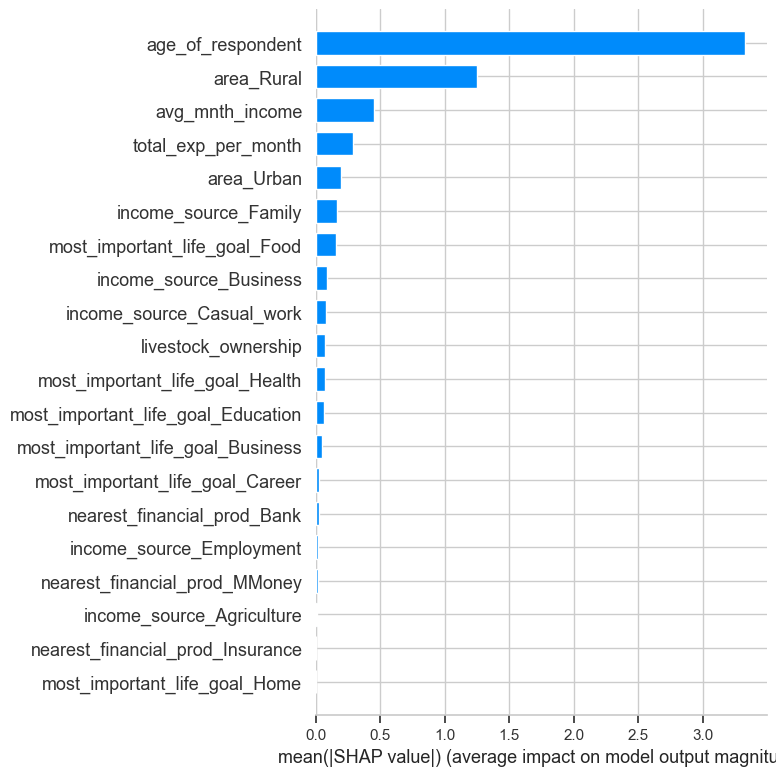

In [151]:
print("SHAP Summary for Cluster 1")
shap_values_for_cluster1 = shap_values_kp[:, :, 0]
shap.summary_plot(shap_values_for_cluster1, shap_data, plot_type="bar", plot_size=(8, 8))

For Cluster 1 we have:
- Age of respondent
- Average monthly income
- Area
- Total Expenditure

In [134]:
# numerical attributes
cluster1_num = cluster1[['age_of_respondent', 'avg_mnth_income', 'total_exp_per_month']]
cluster1_num.describe()


,age_of_respondent,avg_mnth_income,total_exp_per_month
count,442.000000,442.000000,442.000000
mean,28.839367,7929.638009,10508.257919
std,7.873086,5816.385827,6202.132315
min,16.000000,100.000000,500.000000
25%,23.000000,3050.000000,6000.000000
50%,28.000000,7000.000000,10000.000000
75%,34.000000,10000.000000,15000.000000
max,52.000000,30000.000000,30000.000000


For cluster1: 
- Average age of respondent is 28, ranging from 16 to 52,
- Average Monthly Income is about 8000, ranging from 100 to 30000, and
- Average total expenditure per month is about 10500, ranging from 500 to 30000

Lets check the distribution:

<Axes: ylabel='Frequency'>

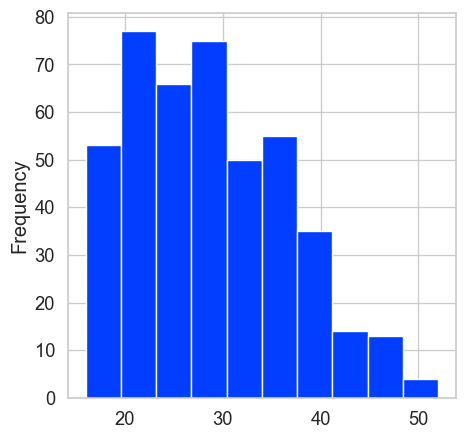

In [144]:
cluster1['age_of_respondent'].plot(kind='hist')

- Most of the respondents age below 40 years and a few going upto 52 years.

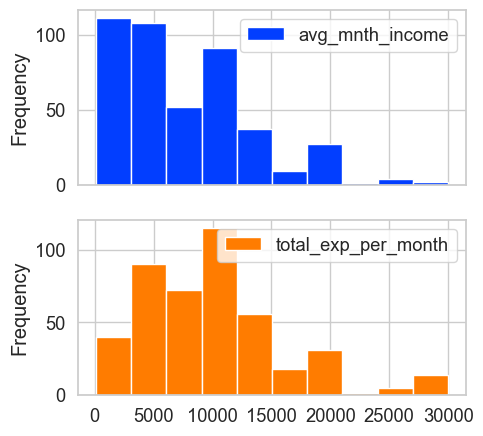

In [148]:
cluster1_num[['avg_mnth_income', 'total_exp_per_month']].plot(subplots=True, kind='hist')
plt.show()

- Most house holds from cluster 1 earn 20000 shillings and below with few going to 30000.
- The case is same for monthly income expenditure.


In [153]:
# Area
cluster1['area'].value_counts()

area
Urban    271
Rural    171
Name: count, dtype: int64

In [166]:
#monthly expenditure
nakuru_df['livestock_ownership'] = nakuru_df['livestock_ownership'].astype('int')

In [169]:
#map remaining attributes
replacements = {'Yes': 1, 'No': 0}
nakuru_df['chronic_illness'] = nakuru_df['chronic_illness'].replace(replacements)
nakuru_df['nhif_usage'] = nakuru_df['nhif_usage'].replace(replacements)
nakuru_df['nssf_usage'] = nakuru_df['nssf_usage'].replace(replacements)
nakuru_df['hse_land_loan'] = nakuru_df['hse_land_loan'].replace(replacements)
nakuru_df['securities_use'] = nakuru_df['securities_use'].replace(replacements)
nakuru_df['land_house_ownership'] = nakuru_df['land_house_ownership'].replace(replacements)
nakuru_df['electronic_device'] = nakuru_df['electronic_device'].replace(replacements)
nakuru_df['motorvehicle_ownership'] = nakuru_df['motorvehicle_ownership'].replace(replacements)
nakuru_df['insurance'] = nakuru_df['insurance'].replace(replacements)